## 1 导出Boston数据集

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
pd.set_option('precision',3)
sns.set(style="white", color_codes=True)


dataset = load_boston()
boston = np.c_[dataset.data, dataset.target]
columns = list(dataset.feature_names)
columns.append("MEDV")
boston = pd.DataFrame(boston, columns=columns)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.0,2.31,0.0,0.538,6.575,65.2,4.090,1.0,296.0,15.3,396.90,4.98,24.0
1,0.027,0.0,7.07,0.0,0.469,6.421,78.9,4.967,2.0,242.0,17.8,396.90,9.14,21.6
2,0.027,0.0,7.07,0.0,0.469,7.185,61.1,4.967,2.0,242.0,17.8,392.83,4.03,34.7
3,0.032,0.0,2.18,0.0,0.458,6.998,45.8,6.062,3.0,222.0,18.7,394.63,2.94,33.4
4,0.069,0.0,2.18,0.0,0.458,7.147,54.2,6.062,3.0,222.0,18.7,396.90,5.33,36.2


## 2 绘制部分特征的相关系数矩阵

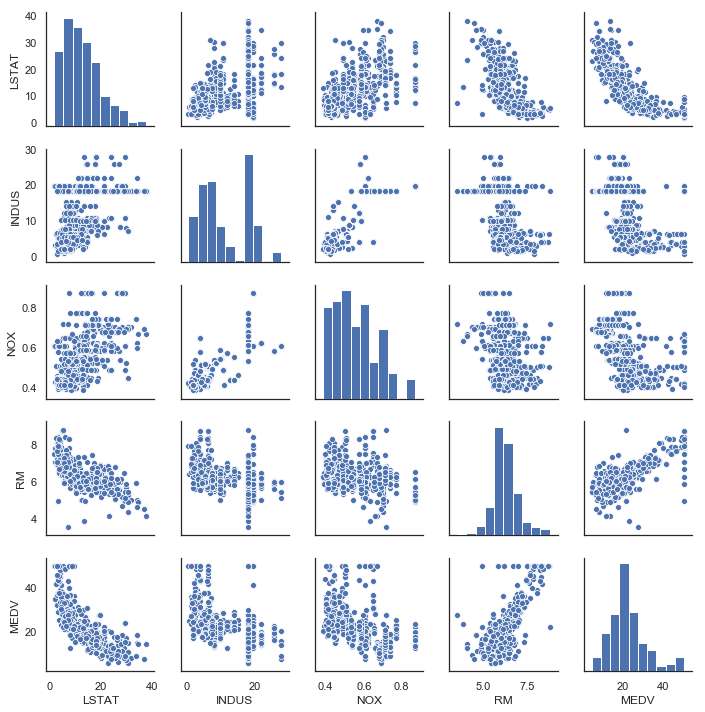

In [2]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

# 参数height用于设置每行的高度
sns.pairplot(boston[cols], height=2)
# font_scale控制坐标字体的大小
sns.set(font_scale=1)
plt.show()

## 3 查看各特征的相关系数

In [3]:
# 等价于np.corrcoef(boston.values.T)
# scipy.stats.pearsonr(X, y)中的X必须为单列的array，不方便  
corr_df = pd.DataFrame(boston).corr()
corr_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427


## 4 根据相关系数的绝对值绘制热力图

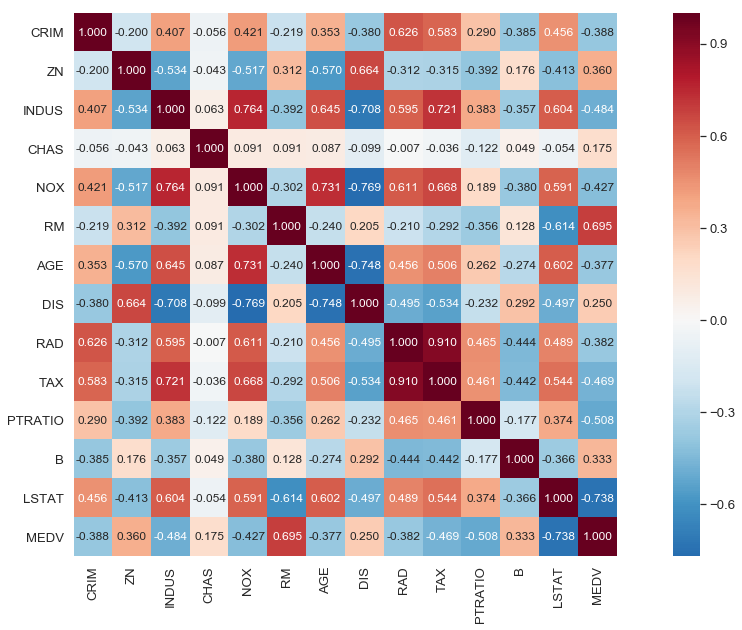

In [4]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.2)

# annot_kws中的size用于设置相关系数字体的大小
# vmin=-1, vmax=1
sns.heatmap(corr_df, cbar=True, annot=True, square=True, cmap='RdBu_r', fmt='.3f',
            center=0, annot_kws={'size':12}, yticklabels=columns, xticklabels=columns)  
plt.show()

## 5 对比pandas的corr函数提供的3种相关系数方式

In [5]:
MEDV_pearson = boston.corr()["MEDV"]
MEDV_kendall = boston.corr("kendall")["MEDV"]
MEDV_spearman = boston.corr("spearman")["MEDV"]

corr_dict = {"MEDV_pearson":MEDV_pearson, "MEDV_kendall":MEDV_kendall, "MEDV_spearman":MEDV_spearman}
corr_matrix = pd.DataFrame(corr_dict).sort_values(["MEDV_pearson"], ascending=False)
corr_matrix

,MEDV_pearson,MEDV_kendall,MEDV_spearman
MEDV,1.000,1.000,1.000
RM,0.695,0.483,0.634
ZN,0.360,0.340,0.438
B,0.333,0.127,0.186
DIS,0.250,0.313,0.446
CHAS,0.175,0.115,0.141
AGE,-0.377,-0.388,-0.548
RAD,-0.382,-0.248,-0.347
CRIM,-0.388,-0.404,-0.559
NOX,-0.427,-0.395,-0.563


### 返回相关系数绝对值不低于0.5的特征

In [6]:
corr_feartue = corr_matrix.index[corr_matrix["MEDV_pearson"].abs() >= 0.5].drop(["MEDV"])
corr_feartue

Index(['RM', 'PTRATIO', 'LSTAT'], dtype='object')